$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Introduction to Reinforcement Learning

## Concepts

Imagine a position in a tic-tac-toe game (knots and crosses).
How do you choose the best  next action?

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/ttt1-crop.png">

Which are you most likely to win from?
Guess at how likely you are  to win from each state.  Is a win 
definite, likely, or maybe?

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/ttt2-crop.png">

## States and Actions

Set of possible states, $\mathcal{S}$.

   * Can be discrete values ($|\mathcal{S}| < \infty$)
       * Tic-Tac-Toe game positions
       * Position in a maze
       * Sequence of steps in a plan
   *  Can be continuous values ($|\mathcal{S}| = \infty$)
       * Joint angles of a robot arm
       * Position and velocity of a race car
       * Parameter values for a network routing strategy 

Set of possible actions, $\mathcal{A}$.

   * Can be discrete values ($|\mathcal{A}| < \infty$)
       *  Next moves in Tic-Tac-Toe 
       * Directions to step in a maze
       * Rearrangements of a sequence of steps in a plan
   * Can be continuous values ($|\mathcal{A}| = \infty$)
       * Torques to apply to the joints of a robot arm
       *  Fuel rate and turning torque in a race car
       * Settings of parameter values for a network routing strategy 

## Values

We want to choose the action that we predict will result in the best
possible future from the current state.  Need a value that
represents the future outcome.

What should the value represent?

   * Tic-Tac-Toe: Likelihood of winning from a game position.
   * Maze: Number of steps to reach the goal.
   * Plan: Efficiency in time and cost of accomplishing the objective  for particular rearrangment of steps in a plan.
   * Robot: Energy required to move the gripper on a robot arm to a destination.
   * Race car: Time to reach the finish line.
   * Network routing: Throughput.

With the correct values, multi-step decision problems are reduced
to single-step decision problems.  Just pick action with best
value.  Guaranteed to find optimal multi-step solution (dynamic programming).

The utility or cost of a single action taken from a state is the **reinforcement**
for that action from that state. The value of that state-action is
the expected value of the full **return** or the sum of reinforcements that will follow
when that action is taken.

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/returns1-crop.png">

Say we are in state $s_t$ at time $t$.  Upon taking action $a_t$
from that state we observe the one step reinforcement $r_{t+1}$,
and the next state $s_{t+1}$. 

Say this continues until we reach a goal state, $K$ steps later.
What is the return $R_t$ from state $s_t$?

$$
    \begin{align*}
      R_t = \sum_{k=0}^K r_{t+k+1}
    \end{align*}
$$


Use the returns to choose the best action.

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/returns2-crop.png">

Right...are we maximizing or minimizing?  What does the
reinforcement represent?  Let's say it is energy used that we want
to minimize.  $a_1$, $a_2$, or $a_3$?

Where do the values come from?

   * Write the code to calculate them.    
      * Usually not possible. If you can do this for your problem, why are you considering machine learning? Might be able to do this for Tic-Tac-Toe.
   * Use dynamic programming.
      *   Usually not possible. Requires knowledge of the probabilities of transitions between all states for all actions. 
   * Learn from examples, lots of examples. Lots of 5-tuples: state, action, reinforcement, next state, next action ($s_t, a_t, r_{t+1}, s_{t+1}, a_{t+1}$).
      *  **Monte Carlo:** Assign to each state-action pair an average of the observed returns: $ \;\;\;\text{value}(s_t,a_t) \approx \text{mean of } R(s_t,a_t)$
      *  **Temporal Difference (TD):** Using $\text{value}(s_{t+1},a_{t+1})$ as estimate of return from next state, update current state-action value: $\;\;\; \text{value}(s_t,a_t) \approx r_{t+1} + \text{value}(s_{t+1},a_{t+1})$

What is the estimate of the return $R$ from state B?

![image](http://www.cs.colostate.edu/~anderson/cs480/notebooks/tdadvantage-crop.png)

   * **Monte Carlo:** $\text{mean of } R(s_t,a_t)$ =  1, a prediction of a win
   * **Temporal Difference (TD):** $r_{t+1} +  \text{value}(s_{t+1},a_{t+1}) =  0 + (100(-1) + 2(1))/100 =  -0.98$, a very likely loss
   * What do you do? The green pill  or the red pill?
   * TD takes advantage of the cached experience given in the value learned for State C.

## Example: Maze


Here is a simple maze.

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/mazepic-crop.png">

From any position, how do you decide whether to move up, right, down, or left?

Right.  Need an estimate of the number of steps to reach the
goal. This will be the return $R$. How do we  formulate this in terms of
reinforcements?

Yep. $r_t = 1$ for every step.  Then $R_t = \sum_{k=0}^K r_{t+k+1}$ will sum of those 1's to produce the number of steps to
goal from each state.

The Monte-carlo way will assign value as average of number of steps to goal from each
starting state tried.

The TD way will update value based on (1 + estimated value from next state).


Should we do Monte-Carlo update or Temporal-Difference updates?  Take a look at this comparison on the maze problem.

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/maze1.png">

# State-Action Value Function as a Table

## Tabular Function

Recall that the state-action value function is a function of
both state and action and its value is a prediction of the
expected sum of future reinforcements.

We will call the state-action value function $Q$, after
[Learning from Delayed Rewards](http://www.cs.rhul.ac.uk/~chrisw/thesis.html), by C. Watkins, PhD
Thesis, University of Cambridge, Cambridge, UK, 1989.

We can select our current belief of what the optimal action, $a_t^o$, is in state $s_t$ by

$$
    \begin{align*}
      a_t^o = \argmax{a} Q(s_t,a)
    \end{align*}
$$

or

$$
    \begin{align*}
      a_t^o = \argmin{a} Q(s_t,a)
    \end{align*}
$$

## Tabular Q for the Maze Problem

### Representing the Q Table

For the maze world,

$$
    \begin{align*}
      a_t^o = \argmin{a} Q(s_t,a)
    \end{align*}
$$


looks like (argmax should be argmin)

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/qactionmaze-crop.png">

A bit more mathematically, let the current state be given by
position in $x$ and $y$ coordinates and actions are integers 1 to
4. Then

$$
    \begin{align*}
      a_t^o = \argmin{a\in \{1,2,3,4\}} Q\left ((x,y), a\right )
    \end{align*}
$$


Now, let's try to do this in python.

How do we implement the Q function?  For the maze problem, we know we can

   *  enumerate all the states (positions) the set of which is finite ($10\cdot 10$),
   *  enumerate all actions, the set of which is finite (4),
   *  calculate the new state from the old state and an action, and
   *  represent in memory all state-action combinations ($10\cdot 10\cdot 4$).

So, let's just store the Q function in table form.

The Q table will need three dimensions, for $x$, $y$, and the action.

![image](http://www.cs.colostate.edu/~anderson/cs480/notebooks/qtablemaze-crop.png)

How do we look up the Q values for a state?

![image](http://www.cs.colostate.edu/~anderson/cs480/notebooks/qtablemazestate-crop.png)

Q values are steps to goal, so we are minimizing.  Select right or down action.

We are finally ready for python.  How can we make a three-dimensional table of Q values, if $x$ and $y$ have 10 possible values
and we have 4 actions?

     import numpy as np
     Q = np.zeros((10,10,4))

How should we initialize the table?  Above line initializes all values to be zero.  What effect will
this have as Q values for actions taken are updated to estimate steps to goal?

Actions not yet tried will have lowest (0) Q value. Forces
the agent to try all actions from all states---lots of **exploration**.

### Updating the Q Table Using Temporal-Difference Updates

What must we do after observing $s_t$, $a_t$, $r_{t+1}$, $s_{t+1}$, and $a_{t+1}$?

Calculate the temporal-difference error $r_{t+1} + Q(s_{t+1},a_{t+1}) - Q(s_t,a_t)$ and use it to
update the Q value stored for $s_t$ and $a_t$:

$$
    \begin{align*}
      Q(s_t,a_t) = Q(s_t,a_t) + \rho (r_{t+1} + Q(s_{t+1},a_{t+1}) - Q(s_t,a_t))
    \end{align*}
$$


And, in python? Assume position, or state, $(2,3)$ is implemented as ''state = np.array([2,3])''.

    r = 1
    Qold = Q[stateOld[0], stateOld[1], actionOld]
    Qnew = Q[state[0], state[1], action]
    TDError = r + Qnew - Qold
    Q[stateOld[0], stateOld[1], actionOld] = Qold + rho * TDError


This is performed for every pair of steps $t$ and $t+1$, until the final step,
which must be handled differently.  There is no $s_{t+1}$.
The update

$$
    \begin{align*}
      Q(s_t,a_t) = Q(s_t,a_t) + \rho (r_{t+1} + Q(s_{t+1},a_{t+1}) - Q(s_t,a_t))
    \end{align*}
$$

becomes

$$
    \begin{align*}
      Q(s_t,a_t) = Q(s_t,a_t) + \rho (r_{t+1}  - Q(s_t,a_t))
    \end{align*}
$$


In python, add a test for being at the goal. Let ''maze'' be character array containing a ''G'' at the
goal position.

    r = 1
    Qold = Q[stateOld[0], stateOld[1], actionOld]
    Qnew = Q[state[0], state[1], action]

    if (maze[state[0]+1,state[1]+1] == 'G'):
        TDerror = r - Qold
    else:
        TDerror = r + Qnew - Qold

    Q[stateOld[0], stateOld[1], actionOld] = Qold + rho * TDerror


To choose the best action for state $(x, y)$ stored in variable state,
just need to do

     a = np.argmin(Q[state[0],state[1],:])

and if we store the available actions as

     actions = np.array([[0,1],[1,0],[0,-1],[-1,0]])

then the update to state based on action a is done by

     state = state + actions[a,:]

## The Agent-Environment Interaction Loop

For our agent to interact with its world, we must implement the steps

   1.  Initialize Q.
   1.  Choose random, non-goal, state.
   1. Repeat:
       1. If at goal,
        1. Update Qold with TD error (1 - Qold)
        1. Pick new random state
       1. Otherwise (not at goal),
         1. Select next action.
         1. If not first step, update Qold with TD error (1 + Qnew - Qold)
         1.  Shift current state and action to old ones.
         1. Apply action to get new state.

In Python it would look something like the following for a 10x10 maze.

     Q = np.zeros((10,10,4))                  # 1.
     s = np.random.randint(0,10,2)            # 2.
     for step in xrange(10000):               # 3. (or forever)
         if isGoal(s):                        # 3.A.
             Q[sOld[0],sOld[1],aOld] +=       # 3.A.a
                  rho * (1 - Q[sOld[0],sOld[1],aOld])
             s = np.random.randint(0,10,2)    # 3.A.b
         else:                                # 3.B
             a = np.argmin(Q[s[0],s[1],:])    # 3.B.a
             if steps > 1:
                 Q[sOld[0],sOld[1],aOld] +=   # 3.B.b
                      rho * (1 + Q[s[0],s[1],a] - Q[sOld[0],sOld[1],aOld])
             sOld, aOld = s, a                # 3.B.c
             s += actions[a,:]                # 3.B.d

# Python Solution of the Maze Problem

First, we start with a text file that specifies a maze.  Let's use the cell magic %%writefile to make the maze file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# import random

In [2]:
%%writefile maze1.txt
************
*          *
*          *
*          *
*          *
*          *
*  *****   *
*      *   *
*  G   *   *
*      *   *
*          *
************

Overwriting maze1.txt


In [3]:
with open('maze1.txt') as f:
    for line in f:
        print(line.strip())

************
*          *
*          *
*          *
*          *
*          *
*  *****   *
*      *   *
*  G   *   *
*      *   *
*          *
************


In [4]:
mazelist = []
with open('maze1.txt') as f:
    for line in f:
        mazelist.append(line.strip())
mazelist

['************',
 '*          *',
 '*          *',
 '*          *',
 '*          *',
 '*          *',
 '*  *****   *',
 '*      *   *',
 '*  G   *   *',
 '*      *   *',
 '*          *',
 '************']

In [5]:
maze = np.array(mazelist).view('U1').reshape((len(mazelist), len(mazelist[0])))
print(maze.shape)
maze

(12, 12)


array([['*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*'],
       ['*', ' ', ' ', '*', '*', '*', '*', '*', ' ', ' ', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', '*', ' ', ' ', ' ', '*'],
       ['*', ' ', ' ', 'G', ' ', ' ', ' ', '*', ' ', ' ', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', '*', ' ', ' ', ' ', '*'],
       ['*', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*'],
       ['*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*']], 
      dtype='<U1')

In [6]:
for i in range(maze.shape[0]):
    for j in range(maze.shape[1]):
        print(maze[i,j],end='')
    print()

************
*          *
*          *
*          *
*          *
*          *
*  *****   *
*      *   *
*  G   *   *
*      *   *
*          *
************


Need some functions, one to draw the Q surface, over the two-dimensional state space (position in the maze), and one to select an action given the Q surface.

In [7]:
### Draw Q surface, showing minimum Q value for each state
def showQ(Q,title,ax):
    (m,n,_) = Q.shape
    gridsize = max(m,n)
    xs = np.floor(np.linspace(0,m-0.5,gridsize))
    ys = np.floor(np.linspace(0,n-0.5,gridsize))
    xgrid,ygrid = np.meshgrid(xs,ys)
    points = np.vstack((xgrid.flat,ygrid.flat))

    Qmins = [np.min( Q[s1,s2,:]) for (s1,s2) in zip(points[0,:],points[1,:])]
    Qmins = np.asarray(Qmins).reshape(xgrid.shape)
    ax.plot_surface(xgrid,ygrid,Qmins,rstride=1,cstride=1,color='yellow')
    ax.set_zlabel("Qmin")
    ax.set_title("Min %d Max %d" % tuple(np.round((np.min(Qmins),np.max(Qmins)))))

### Show current policy
def showPolicy(Q):
    (m,n,_) = Q.shape
    bestactions = np.argmin(Q,axis=2)
    px,py = np.meshgrid(np.arange(m)-0.5, np.arange(n)-0.5)
    pts = np.vstack((px.flat,py.flat)).T
    arrowx = actions[:,0][bestactions]
    arrowy = actions[:,1][bestactions]
    plt.quiver(px,py,arrowx,arrowy)

Construct arrays to hold the tabular Q values updated by temporal differences, and one to hold Q values updated by Monte Carlo.  Set Q values to *np.inf* for invalid actions.  We have four possible actions from each position.

In [8]:
m,n = maze.shape
m -= 2  # for ceiling and floor
n -= 2  # for walls
Q = np.zeros((m,n,4))
Qmc = np.zeros((m,n,4))
actions = np.array([[0,1], [1,0], [0,-1], [-1,0]])  # changes in row and column position of RL agent

### Set Q value of invalid actions to np.inf
for mi in range(m):
    for ni in range(n):
        for ai in range(4):
            r = mi + actions[ai,0]
            c = ni + actions[ai,1]
            if maze[r+1,c+1] == '*':  # showing ai was invalid action
                Q[mi,ni,ai] = np.inf
                Qmc[mi,ni,ai] = np.inf

Now for some parameters.  Let's run for 50,000 interactions with maze environment, so 50,000 updates, and let $\rho$, the learning rate, be 0.1 and $\epsilon$, the random action probability, be 0.01.

In [9]:
nSteps = 50000
rho = 0.2
epsilon = 0.1

Now we need to keep a history, or trace, of positions and reinforcement, to be used to update the MC version of Q.

In [15]:
trace = np.zeros((nSteps,3)) # for x, y, and a

In [16]:
from IPython.display import display, clear_output

Need some initializations before starting the loop.

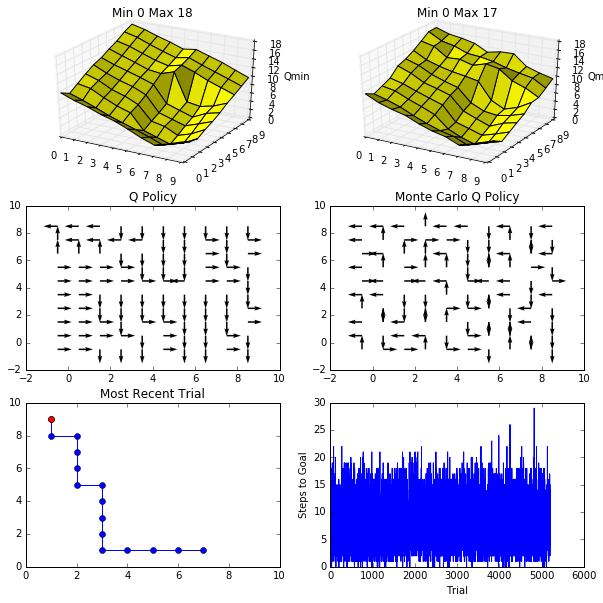

In [17]:
fig = plt.figure(figsize=(10,10))

s = np.array([1,1])  # start position
a = 1 #first action (index)
trials = []
steps = 0
goals = 0

for step in range(nSteps):
    trace[steps,:] = s.tolist() + [a]
    here = maze[s[0]+1, s[1]+1]
    if here == 'G':
        # Found the Goal!
        goals += 1
        Q[s[0],s[1],a] = 0
        if steps > 0:
            Q[sold[0],sold[1],aold] += rho * (1 - Q[sold[0],sold[1],aold])
            
        # Monte Carlo update
        cost = 0
        for sai in range(steps,-1,-1):
            r,c,act = trace[sai,:]
            Qmc[r,c,act] = (1-rho) * Qmc[r,c,act] + rho * cost
            cost += 1

        s = np.array([np.random.randint(0,m),np.random.randint(0,n)])
        #sold = []
        trials.append(steps)
    
    else:
        # Not goal
        steps += 1    
        Qfunc = Q  # Qfunc = Qmc # to use Monte Carlo policy to drive behavior
    
        # Pick next action a
        if np.random.uniform() < epsilon:
            validActions = [a for (i,a) in enumerate(range(4)) if not np.isinf(Qfunc[s[0],s[1],i])]
            a = np.random.choice(validActions)
        else:
            a = np.argmin(Qfunc[s[0],s[1],:])

        if steps > 1:
            Q[sold[0],sold[1],aold] += rho * (1 + Q[s[0],s[1],a] - Q[sold[0],sold[1],aold])

        sold = s
        aold = a
        s = s + actions[a,:]

    if here == 'G' and goals % 100 == 0:
        
        fig.clf()
        
        ax = fig.add_subplot(3,2,1, projection='3d')
        showQ(Q,"TD",ax)

        ax = fig.add_subplot(3,2,2, projection='3d')
        showQ(Qmc,"Monte Carlo",ax)
        plt.subplot(3,2,3)
        showPolicy(Q)
        plt.title("Q Policy")

        plt.subplot(3,2,4)
        showPolicy(Qmc)
        plt.title("Monte Carlo Q Policy")

        plt.subplot(3,2,5)
        plt.plot(trace[:steps,0],trace[:steps,1],'o-')
        plt.plot(trace[0,0],trace[0,1],'ro')
        plt.xlim(0,m)
        plt.ylim(0,n)
        plt.title("Most Recent Trial")

        plt.subplot(3,2,6)
        plt.plot(trials,'-')
        plt.xlabel("Trial")
        plt.ylabel("Steps to Goal")

        clear_output(wait=True)
        display(fig);

    if here == 'G':
        steps = 0
        
clear_output(wait=True)